<a href="https://colab.research.google.com/github/IronFist396/WnCC-ML/blob/main/Week-3/CNNassignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CNN assignment**(Do read the note at the end)

Description: Here we are going to use CNN to classify images of elephants,tigers,cheetah's and crocodiles. Basically multiclass classificiation using CNN.

**Q.1** Import all required modules

In [ ]:
#Your code here
import tensorflow as tf
from tensorflow.keras import layers,models
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Q.2** Load data using image_dataset_from_directory(https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image_dataset_from_directory)

In [ ]:
data = tf.keras.preprocessing.image_dataset_from_directory(
    '/content/drive/MyDrive/ML - WnCC (Practice Files)/ML Week 3/CNN/data',
    labels='inferred',
    label_mode='categorical',
    color_mode='rgb',
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=123,
    # validation_split=0.2,
    # subset='training',
)

Found 1657 files belonging to 4 classes.




*   Since data object is not iterable,we will create a nummpy iterator for data.
*   Then use batch to iterate through our data



In [ ]:
data_iterator=data.as_numpy_iterator()

In [ ]:
batch=data_iterator.next()

Run the below code and batch code 2-3 times to visualise the labels given to different animals.

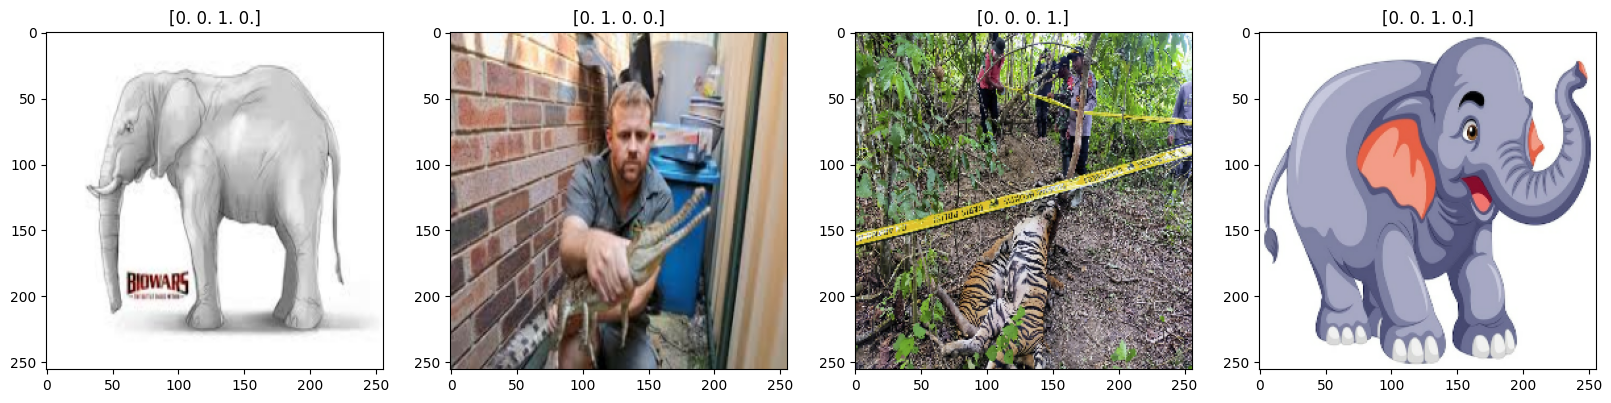

In [ ]:
fig,ax=plt.subplots(ncols=4,figsize=(20,20))
for idx,img in enumerate(batch[0][:4]):
  ax[idx].imshow(img.astype(int))
  ax[idx].title.set_text(str(batch[1][idx]))

**Q.3** Map the data such that all pixel values lie between 0 and 1 using the **lambda function**

In [ ]:
data=data.map(lambda x,y: (x/255, y))

**Q.4** Split the data into train set and test set(and validation set if needed) using **data.take**(https://www.geeksforgeeks.org/tensorflow-js-tf-data-dataset-class-take-method/) and **data.skip**(https://www.geeksforgeeks.org/tensorflow-js-tf-data-dataset-skip-method/)

In [ ]:

#Your code here
# Let's do a 90-10 split => Total 1657 images => 90% == 1492

total_batches = len(data)
train_size = int(total_batches * 0.9)
test_size = total_batches - train_size

train_dataset = data.take(train_size)
test_dataset = data.skip(test_size)

**Creating the model**

**Q.5** Write code to create CNN model including fully connected layers with softmax as final layer.

In [ ]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(4, activation='softmax')  # 4 classes, so final layer has 4 neurons with softmax activation
])


**Q.6** Compile your model

In [ ]:
model.compile(optimizer='adam',
            loss='categorical_crossentropy',
            metrics=['accuracy'])

**Q.7** Fit your model with train set and make sure to keep **less epochs**(10-15) as the dataset size is very large.

In [ ]:
model.fit(train_dataset, epochs=10)

Epoch 1/10
46/46 [==============================] - 22s 235ms/step - loss: 1.6618 - accuracy: 0.3308
Epoch 2/10
46/46 [==============================] - 14s 251ms/step - loss: 1.2307 - accuracy: 0.4429
Epoch 3/10
46/46 [==============================] - 14s 255ms/step - loss: 0.9375 - accuracy: 0.6291
Epoch 4/10
46/46 [==============================] - 14s 262ms/step - loss: 0.6859 - accuracy: 0.7323
Epoch 5/10
46/46 [==============================] - 14s 257ms/step - loss: 0.4103 - accuracy: 0.8587
Epoch 6/10
46/46 [==============================] - 15s 283ms/step - loss: 0.2451 - accuracy: 0.9137
Epoch 7/10
46/46 [==============================] - 14s 255ms/step - loss: 0.1750 - accuracy: 0.9409
Epoch 8/10
46/46 [==============================] - 14s 262ms/step - loss: 0.1038 - accuracy: 0.9688
Epoch 9/10
46/46 [==============================] - 14s 259ms/step - loss: 0.0608 - accuracy: 0.9796
Epoch 10/10
46/46 [==============================] - 14s 258ms/step - loss: 0.0468 - accura

**Q.8** Test your code with test set

In [ ]:
loss,accuracy=model.evaluate(test_dataset)

46/46 [==============================] - 15s 225ms/step - loss: 0.0727 - accuracy: 0.9823


In [ ]:
# Do not change this code
if accuracy>=0.85:
  print(f"Congratulations, CNN assignment complete!! Your accuracy is {accuracy}")
else:
  print(f"Try again, not enough accuracy! Your accuracy is {accuracy}" )

Congratulations, CNN assignment complete!! Your accuracy is 0.9822525382041931


**Note: 1. Many of you will get very high train accuracy but low test accuracy. This is called overfitting, this can be solved by increasing the train set size. If your getting low accuracy for both train and test, modify your layers in the model.**

**2.Do use T4GPU.Ideally your first epoch will take quite sometime and rest of the epochs will be faster but if all your epochs are taking a lot of time, try starting a new gpu session(open a new gmail account and open colab on that) because your free gpu might have exhausted itself.**

**3.Other than that everything should be fine, happy learning!!**